In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
aa=pd.DataFrame()
for dirname, _, filenames in os.walk('./data/Datasets'):
    if 'other' in dirname : continue # skip
    for filename in filenames:
        
        df=pd.read_csv(os.path.join(dirname, filename))
        df['filaname']=filename
        df['season'] = filename.split('.')[0]
        aa=pd.concat([aa,df])
aa.shape, aa.drop_duplicates().shape

((8020, 146), (8020, 146))

In [286]:
aa.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=146)

In [3]:
# aa['Date']=pd.to_datetime(aa.Date, format='yyyy-mm-dd')
matches=aa.iloc[: , :24, ]
matches['season'] = aa.season
matches['fouls']=matches['HF'] + matches['AF']
matches['goals']=matches['FTHG'] + matches['FTAG']
matches['corners']=matches['HC'] + matches['AC']
# matches['year']=matches.Date.dt.year

# plot, home goals against away golas for all seasons for all teams

<AxesSubplot:title={'center':'Total score per season'}, xlabel='season', ylabel='Goals'>

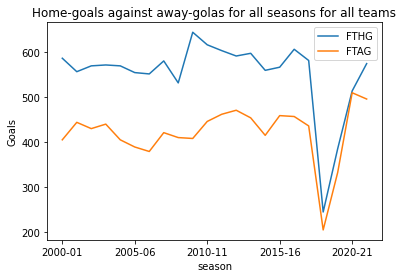

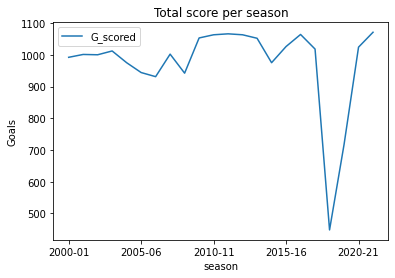

In [6]:
matches[['season', 'FTHG', 'FTAG']].groupby(['season']).sum(numeric_only=True).plot(ylabel='Goals',title='Home-goals against away-golas for all seasons for all teams')
matches_pt[['season', 'G_scored']].groupby(['season']).sum('G_scored').plot(ylabel='Goals', title='Total score per season')

## Top/Net scores per season

In [5]:
matches_h = matches[['season','HomeTeam', 'FTHG', 'FTAG']].rename(columns={'HomeTeam':'team', 'FTHG':'G_scored', 'FTAG':'G_recieved'}).set_index(['team', 'season'])
matches_a = matches[['season','AwayTeam', 'FTAG', 'FTHG']].rename(columns={'AwayTeam':'team', 'FTAG':'G_scored', 'FTHG':'G_recieved'}).set_index(['team', 'season'])
matches_pt = pd.concat([matches_h, matches_a]).reset_index()
matches_pt['net_score'] = matches_pt.G_scored - matches_pt.G_recieved
matches_pt['season_team'] = matches_pt.season +' : ' + matches_pt.team


In [ ]:
matches_pt

                      top score  net_score
season_team                               
2000-01 : Man United       79.0         48
2001-02 : Man United       87.0         42
2002-03 : Arsenal          85.0         43
2003-04 : Arsenal          73.0         47
2004-05 : Arsenal          87.0         51
2005-06 : Chelsea          72.0         50
2006-07 : Man United       83.0         56
2007-08 : Man United       80.0         58
2008-09 : Liverpool        77.0         50
2009-10 : Chelsea         103.0         71
2010-11 : Man United       78.0         41
2011-12 : Man City         93.0         64
2012-13 : Man United       86.0         43
2013-14 : Man City        102.0         65
2014-15 : Man City         83.0         45
2015-16 : Man City         71.0         30
2016-17 : Tottenham        86.0         60
2017-18 : Man City        106.0         79
2018-19 : Man City         45.0         36
2019-20 : Man City         67.0         38
2020-21 : Man City         83.0         51
2021-22 : M

<AxesSubplot:title={'center':'Scores Top/net per season'}, xlabel='season_team', ylabel='Top Score'>

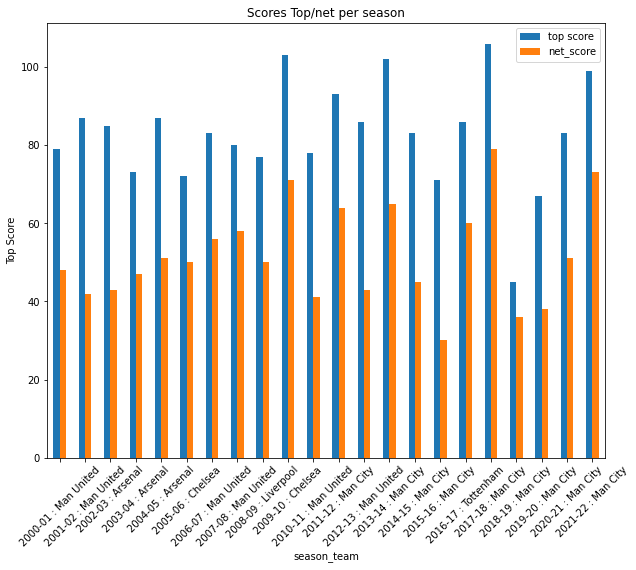

In [282]:
tbl = matches_pt.pivot_table(values='G_scored', index='season', columns='season_team', aggfunc=sum)
x = pd.concat([tbl.idxmax(axis=1),tbl.max(axis=1)], axis=1)#.set_index('0')
x.columns = ['season_team', 'top score']
net_scores = matches_pt[['season_team', 'net_score']].groupby(['season_team']).sum()
x = pd.concat([x.set_index('season_team'),net_scores],  join = 'inner', axis=1)
# # x.to_csv('./out/highest_score.csv')

print (x)
x.plot( y= ['top score', 'net_score'], ylabel = 'Top Score', rot=45, kind='bar',figsize=(10,8), title='Scores Top/net per season')